Referenced code as per task/question :
https://github.com/Classiq/classiq-library/blob/main/community/womanium/assignments/quantum_walk_circle_example.py

In [1]:
# imports
from classiq import *

In [2]:
NUM_QUBITS = 4 # Number of qubits to represent the vertices
NUM_NODES = 2**NUM_QUBITS # Total number of nodes (16 nodes)

In [3]:
#AS PER REFERENTIAL CODE 
@qfunc
def prepare_minus(x: QBit):
  X(x)
  H(x)

@qfunc
def diffuser_oracle(aux: Output[QNum],x:QNum):
  aux^=(x!=0)

@qfunc
def zero_diffuser(x: QNum):
  aux = QNum('aux')
  allocate(1,aux)
  within_apply(compute=lambda: prepare_minus(aux),action=lambda: diffuser_oracle)

In [4]:
def W_iteration(wlknum:int,vertices: QNum, adjacent_vertices:QNum):
    
    buckets = [0] * NUM_NODES # initialize probability to zero for all 16 nodes
    
    print(f'State Vector :Init, probability buckets associated with walk vector ={buckets}')
    if( wlknum==0 ):
        buckets[wlknum+1]=1.0
    elif( wlknum== NUM_NODES-1 ):
        buckets[wlknum-1]=1.0
    else:
        buckets[(wlknum+1)]=1/2
        buckets[(wlknum-1)]=1/2
        
    print(f'QWalk#={wlknum}, probability buckets associated with QWalk ={buckets}')
    
    control(ctrl=vertices==wlknum,
              operand=lambda: within_apply(
              compute= lambda: inplace_prepare_state(probabilities=buckets, bound=0.01, target=adjacent_vertices),
              action= lambda: zero_diffuser(adjacent_vertices)))

In [5]:
@qfunc 
def W_Operator(vertices:QNum, adjacent_vertices: QNum):
    for num in range(NUM_NODES):
      W_iteration(num,vertices,adjacent_vertices)

In [6]:
#the problem's difffusion operator 

@qfunc
def edge_Oracle(qnumres:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
  qnumres |= ((vertices == adjacent_vertices-1) | (vertices == adjacent_vertices+1))


@qfunc 
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
  repeat(count= x.len,
    iteration= lambda i: SWAP(x[i],y[i]))
  

@qfunc 
def S_Operator(vertices:QNum, adjacent_vertices: QNum):
    qnumres = QNum('qnumres')
    edge_Oracle(qnumres,vertices,adjacent_vertices)
    control(ctrl= qnumres==1,operand= lambda: bitwise_swap(vertices,adjacent_vertices))

In [7]:
# driver main module

@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):
  allocate(NUM_QUBITS,vertices)
  hadamard_transform(vertices)
  allocate(NUM_QUBITS,adjacent_vertices)

  W_Operator(vertices,adjacent_vertices)
  S_Operator(vertices,adjacent_vertices)   

qmodel = create_model(main)
quantum_program = synthesize(qmodel)

State Vector :Init, probability buckets associated with walk vector =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
QWalk#=0, probability buckets associated with QWalk =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State Vector :Init, probability buckets associated with walk vector =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
QWalk#=1, probability buckets associated with QWalk =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State Vector :Init, probability buckets associated with walk vector =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
QWalk#=2, probability buckets associated with QWalk =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State Vector :Init, probability buckets associated with walk vector =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
QWalk#=3, probability buckets associated with QWalk =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State Vector :Init, probability buckets associated with walk vector =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
show(quantum_program)

Opening: https://platform.classiq.io/circuit/63b1c6dc-cf5d-46e6-a646-364a9695514b?version=0.43.3


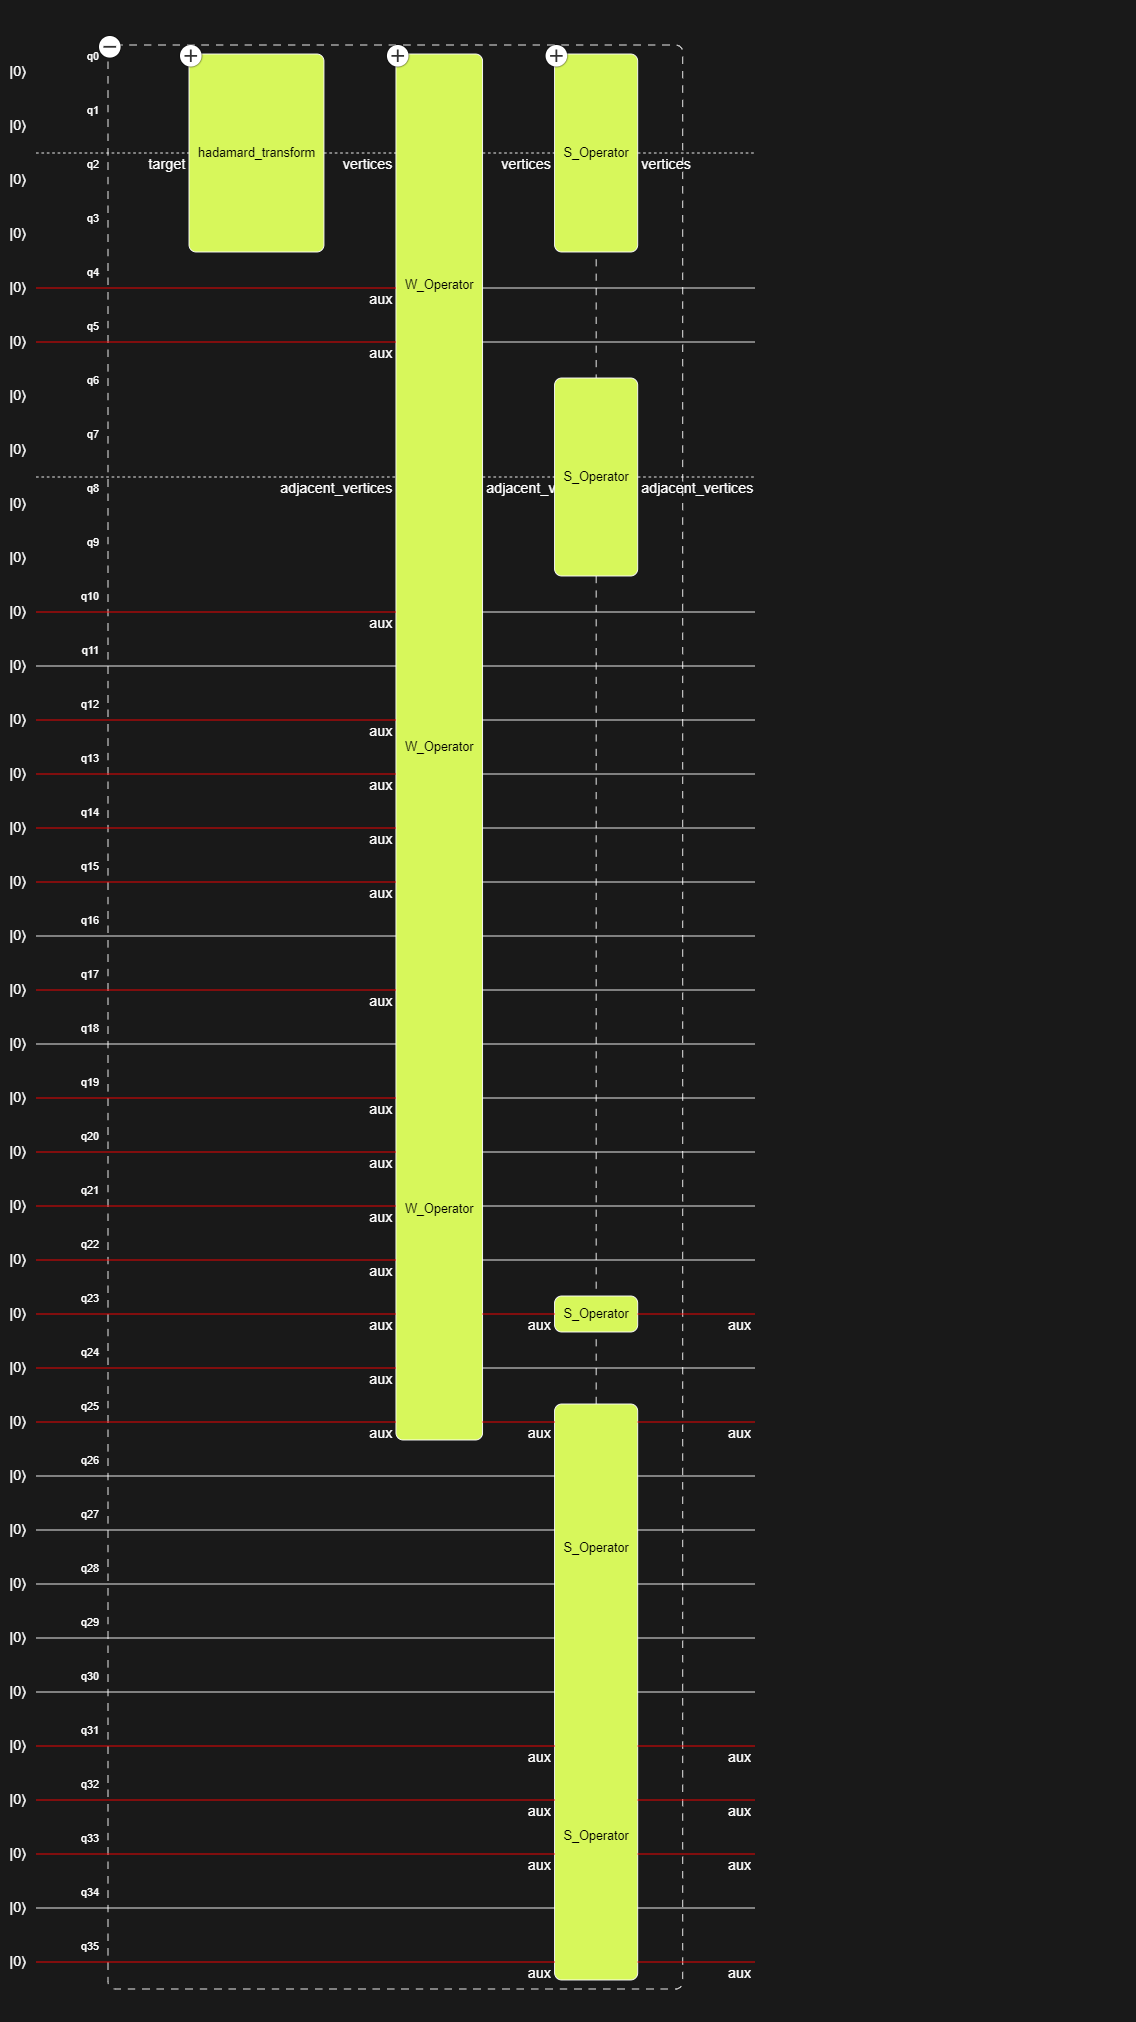

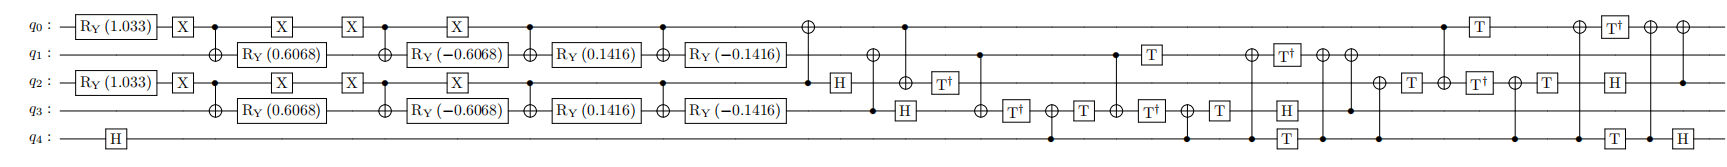

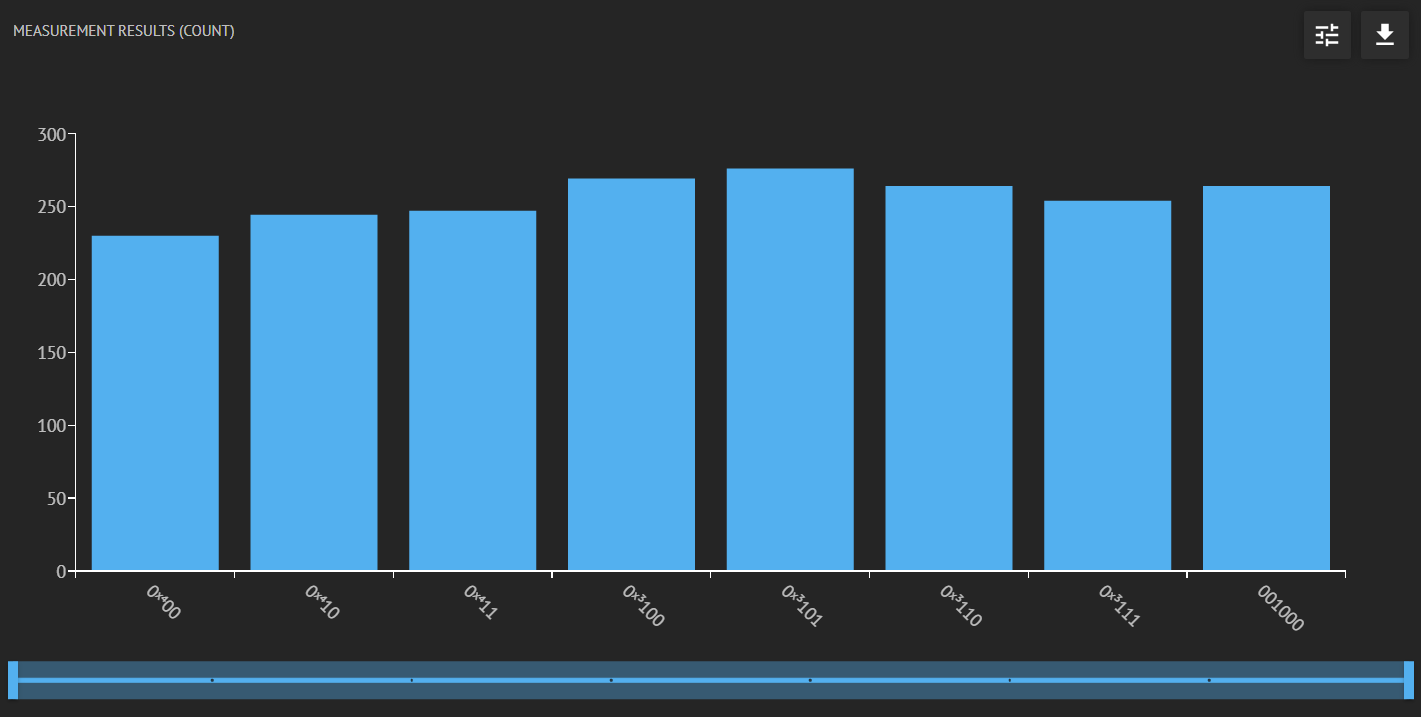

In [9]:
# Fails to run as qubits limit 25 is breached, the below output is for NUM_QUBITS = 4
result = execute(quantum_program).result()[0].value
result.parsed_counts

ClassiqAPIError: Call to API failed with code 400: Requested program requires too many qubits.
Requested qubits: 38, backend: simulator, limit: 25.
Please run a different program or try a different backend.

If you need further assistance, please reach out on our Community Slack channel at: https://short.classiq.io/join-slack